In [1]:
from keras.datasets import fashion_mnist
import pandas as pd
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 
from sklearn import metrics

In [2]:
# Veri Setinin Yüklenmesi
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('Train image data : X=%s, Train class:  y=%s' % (x_train.shape, y_train.shape))
print('Test image data: X=%s, Test class: y=%s' % (x_test.shape, y_test.shape))

Train image data : X=(60000, 28, 28), Train class:  y=(60000,)
Test image data: X=(10000, 28, 28), Test class: y=(10000,)


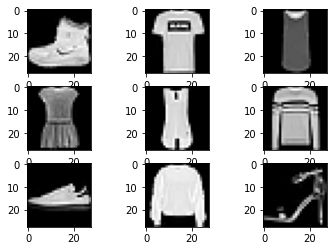

In [3]:
#Yüklenen Veri Setindeki Birkaç Görsel Veri
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Bu kısımda yeniden ölçeklendirme veya normalleştirme yapılıyor.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Sınıf isimleri
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# CNN modelini katman katman oluşturmaya başlıyoruz.

model = tf.keras.models.Sequential()

model.add(#Convolutional layer
    tf.keras.layers.Conv2D(
        filters=32, # Filtre sayısı
        kernel_size=(3, 3), # Her bir filtre 3x3'lük olacak
        strides=(1, 1), # Kaydırma değeri 1
        activation='relu', # ReLu aktivasyon fonksiyonu kullanılacak
        input_shape=(28, 28, 1) # Girdinin 28x28'lik olduğunu belirtiyoruz. Grayscale olduğu için üçüncü değer 1.
    )
) 

model.add( #Maxpooling layer
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # 2x2'lik küçük parçalara bölecek.
        strides=(2, 2) # Kaydırma değeri 2.
    )
)

model.add(#Dropout layer
    #Overfitting'i engellemek için kullanılır.
    #Belli oranda nöronu devre dışı bırakarak modelin aynı verinin birden farklı şeklini öğrenmesini sağlar.
    tf.keras.layers.Dropout(
        rate=0.25 # %25 oranında nöron rastgele devre dışı bırakılacak.
    )
)

model.add(#Flatten Layer
    #Önceki layerdan gelen çok boyutlu veriyi tek boyuta çevirir. Bu sayede Multilayer Perceptron'da kullanabiliriz.
    tf.keras.layers.Flatten()
)

model.add(#Dense Layer(Gizli Katman)
    tf.keras.layers.Dense(
        units=128, # Çıktı adedi
        activation='relu' # ReLu aktivasyon fonksiyonu kullanılacak.
    )
)

model.add(# Output Layer(Çıktı Katmanı)
    #
    tf.keras.layers.Dense(
        units=10, # 10 farklı sınıf olduğu için en sonda 10 çıkış birimi olacak.
        activation='softmax' # Softmax aktivasyon fonksiyonu kullanılacak.
    )
)

In [7]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
# Convolutional'ın çalışabilmesi için boş bir boyut daha eklenmesi gerekiyor.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
# Eğitim veri seti ile CNN'i eğitiyoruz.
history2 = model.fit(
    
      # Eğitim verisi
      x_train, y_train,
                    
      batch_size=256, 

      # Tüm eğitim verilerinin model içerisinde kaç kez kullanılacağı epoch ile ifade edilir.
      epochs=10, 

      # Eğitim verisinin %20'u validation veri seti olarak ayrıldı.
      # Her epoch sonrasında bu validation veri seti ile model değerlendirilecek.
      validation_split=0.2, 

      verbose=1) 

Epoch 1/10
188/188 [==============================] - 20s 104ms/step - loss: 0.5452 - accuracy: 0.8116 - val_loss: 0.3993 - val_accuracy: 0.8617
Epoch 2/10
188/188 [==============================] - 21s 114ms/step - loss: 0.3580 - accuracy: 0.8741 - val_loss: 0.3268 - val_accuracy: 0.8841
Epoch 3/10
188/188 [==============================] - 20s 107ms/step - loss: 0.3135 - accuracy: 0.8897 - val_loss: 0.3098 - val_accuracy: 0.8898
Epoch 4/10
188/188 [==============================] - 21s 110ms/step - loss: 0.2894 - accuracy: 0.8969 - val_loss: 0.2990 - val_accuracy: 0.8925
Epoch 5/10
188/188 [==============================] - 21s 111ms/step - loss: 0.2686 - accuracy: 0.9039 - val_loss: 0.2795 - val_accuracy: 0.8983
Epoch 6/10
188/188 [==============================] - 21s 109ms/step - loss: 0.2545 - accuracy: 0.9074 - val_loss: 0.2791 - val_accuracy: 0.8971
Epoch 7/10
188/188 [==============================] - 20s 108ms/step - loss: 0.2408 - accuracy: 0.9134 - val_loss: 0.2648 - val_ac

In [10]:
# Eğitim Sonrası Test
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2585 - accuracy: 0.9083
Test results - Loss: 0.25850486755371094 - Accuracy: 0.90829998254776


In [11]:
# Test Verisi Sonuçları
predictions = np.argmax(model.predict(x_test),axis=1)
test_report = classification_report(y_test, predictions)
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.87      0.86      1000
           3       0.92      0.89      0.91      1000
           4       0.84      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.74      0.75      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [12]:
f = open("test_report.txt", "w")
f.write(test_report)
f.close()

In [13]:
# Eğitim Verisi Sonuçları
predictions_x = np.argmax(model.predict(x_train),axis=1)
train_report = classification_report(y_train, predictions_x)
print(train_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6000
           1       0.99      0.99      0.99      6000
           2       0.87      0.90      0.89      6000
           3       0.95      0.93      0.94      6000
           4       0.87      0.90      0.88      6000
           5       0.99      0.99      0.99      6000
           6       0.84      0.80      0.82      6000
           7       0.95      0.99      0.97      6000
           8       0.99      0.99      0.99      6000
           9       0.99      0.95      0.97      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



In [14]:
f = open("train_report.txt", "w")
f.write(train_report)
f.close()

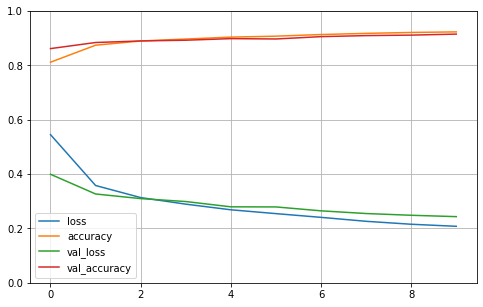

In [15]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
cf = metrics.confusion_matrix(y_test, predictions)
print(cf)

[[847   0  11  13   6   3 112   0   8   0]
 [  1 984   0   9   4   0   2   0   0   0]
 [ 14   1 869   8  47   0  61   0   0   0]
 [ 11  10  11 893  41   0  30   0   4   0]
 [  1   1  69  18 876   0  33   0   2   0]
 [  0   0   0   0   0 985   0  11   0   4]
 [ 92   1  72  23  68   0 739   0   5   0]
 [  0   0   0   0   0   9   0 981   1   9]
 [  2   2   0   2   2   2   5   5 980   0]
 [  0   0   0   0   0   9   1  61   0 929]]


In [17]:
#Köşegenlerdeki değerler testte her bir sınıfın doğruluk oranlarını(accuracy) gösterir.
cf_2 = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
print(cf_2)

[[0.847 0.    0.011 0.013 0.006 0.003 0.112 0.    0.008 0.   ]
 [0.001 0.984 0.    0.009 0.004 0.    0.002 0.    0.    0.   ]
 [0.014 0.001 0.869 0.008 0.047 0.    0.061 0.    0.    0.   ]
 [0.011 0.01  0.011 0.893 0.041 0.    0.03  0.    0.004 0.   ]
 [0.001 0.001 0.069 0.018 0.876 0.    0.033 0.    0.002 0.   ]
 [0.    0.    0.    0.    0.    0.985 0.    0.011 0.    0.004]
 [0.092 0.001 0.072 0.023 0.068 0.    0.739 0.    0.005 0.   ]
 [0.    0.    0.    0.    0.    0.009 0.    0.981 0.001 0.009]
 [0.002 0.002 0.    0.002 0.002 0.002 0.005 0.005 0.98  0.   ]
 [0.    0.    0.    0.    0.    0.009 0.001 0.061 0.    0.929]]


In [18]:
ce = metrics.confusion_matrix(y_train, predictions_x)
print(ce)

[[5371    8   67   80   15    2  438    0   19    0]
 [   3 5952    2   35    5    0    2    0    1    0]
 [  55    3 5429   33  275    1  200    0    4    0]
 [  57   43   24 5577  208    0   89    0    2    0]
 [   5    7  329   73 5405    0  176    0    5    0]
 [   0    1    0    0    0 5949    0   36    5    9]
 [ 428    8  356   68  319    0 4813    0    8    0]
 [   0    0    0    0    0   26    0 5934    0   40]
 [   3    1    3    6   15    2   18    5 5946    1]
 [   0    0    0    0    1   27    0  240    2 5730]]


In [19]:
ce_2 = ce.astype('double') / ce.sum(axis=1)[:, np.newaxis]

In [20]:
#Köşegenlerdeki değerler eğitimde her bir sınıfın doğruluk oranlarını(accuracy) gösterir.
list1 = ce_2.tolist()
print(list1)

[[0.8951666666666667, 0.0013333333333333333, 0.011166666666666667, 0.013333333333333334, 0.0025, 0.0003333333333333333, 0.073, 0.0, 0.0031666666666666666, 0.0], [0.0005, 0.992, 0.0003333333333333333, 0.005833333333333334, 0.0008333333333333334, 0.0, 0.0003333333333333333, 0.0, 0.00016666666666666666, 0.0], [0.009166666666666667, 0.0005, 0.9048333333333334, 0.0055, 0.04583333333333333, 0.00016666666666666666, 0.03333333333333333, 0.0, 0.0006666666666666666, 0.0], [0.0095, 0.007166666666666667, 0.004, 0.9295, 0.034666666666666665, 0.0, 0.014833333333333334, 0.0, 0.0003333333333333333, 0.0], [0.0008333333333333334, 0.0011666666666666668, 0.05483333333333333, 0.012166666666666666, 0.9008333333333334, 0.0, 0.029333333333333333, 0.0, 0.0008333333333333334, 0.0], [0.0, 0.00016666666666666666, 0.0, 0.0, 0.0, 0.9915, 0.0, 0.006, 0.0008333333333333334, 0.0015], [0.07133333333333333, 0.0013333333333333333, 0.059333333333333335, 0.011333333333333334, 0.05316666666666667, 0.0, 0.8021666666666667, 0